In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'/Users/sibikarthik/**SIYA PROJECT/*Data Analysis/2'

In [3]:
# Load the datasets
number_oil_spills = pd.read_csv('/Users/sibikarthik/**SIYA PROJECT/*Data Analysis/2/1- number-oil-spills.csv')
quantity_oil_spills = pd.read_csv('/Users/sibikarthik/**SIYA PROJECT/*Data Analysis/2/2- quantity-oil-spills.csv')
large_oil_spills_decadal = pd.read_csv('/Users/sibikarthik/**SIYA PROJECT/*Data Analysis/2/3- large-oil-spills-decadal.csv')
quantity_oil_spills_decadal_average = pd.read_csv('/Users/sibikarthik/**SIYA PROJECT/*Data Analysis/2/4- quantity-oil-spills-decadal-average.csv')
number_of_tanker_spills_by_operation = pd.read_csv('/Users/sibikarthik/**SIYA PROJECT/*Data Analysis/2/5- number-of-tanker-spills-by-operation-at-time-of-incident-1970-2022.csv')
number_of_tanker_spills_by_primary_cause = pd.read_csv('/Users/sibikarthik/**SIYA PROJECT/*Data Analysis/2/6- number-of-tanker-spills-by-primary-cause-of-spill-1970-2022.csv')

In [4]:
number_oil_spills.head()

,Entity,Code,Year,Large oil spills (>700 tonnes),Medium oil spills (7-700 tonnes)
0,World,OWID_WRL,1970,29,7
1,World,OWID_WRL,1971,14,18
2,World,OWID_WRL,1972,27,48
3,World,OWID_WRL,1973,31,28
4,World,OWID_WRL,1974,27,90


In [5]:
quantity_oil_spills.head()

,Entity,Code,Year,Quantity of oil spilled
0,World,OWID_WRL,1970,383000
1,World,OWID_WRL,1971,144000
2,World,OWID_WRL,1972,313000
3,World,OWID_WRL,1973,159000
4,World,OWID_WRL,1974,174000


In [6]:
large_oil_spills_decadal.head()

,Entity,Code,Year,Decadal large oil spills (>700 tonnes),Decadal medium oil spills (7-700 tonnes)
0,World,OWID_WRL,1970,24,54
1,World,OWID_WRL,1980,9,36
2,World,OWID_WRL,1990,8,28
3,World,OWID_WRL,2000,3,15
4,World,OWID_WRL,2010,2,4


In [7]:
quantity_oil_spills_decadal_average.head()

,Entity,Code,Year,Decadal quantity of oil spilled
0,World,OWID_WRL,1970,319500
1,World,OWID_WRL,1980,117500
2,World,OWID_WRL,1990,113400
3,World,OWID_WRL,2000,19600
4,World,OWID_WRL,2010,16400


In [8]:
number_of_tanker_spills_by_operation.head()

,Entity,Code,Year,At anchor (inland) operations,Bunkering operations,Other operations,Underway (open water) operations,At anchor (open water) operations,Loading/discharging operations,Underway (inland) operations,Unknown operations
0,Large (>700t),NaN,2022,20.0,NaN,83,233.0,10.0,42,82.0,NaN
1,Medium (7-700t),NaN,2022,NaN,33.0,195,NaN,NaN,399,NaN,764.0


In [9]:
number_of_tanker_spills_by_primary_cause.head()

,Entity,Code,Year,Allision/collision causes,Fire/explosion causes,Hull failure causes,Unknown causes,Equipment failure causes,Grounding causes,Other causes
0,Large (>700t),NaN,2022,140,54,60,13,19,150,34
1,Medium (7-700t),NaN,2022,367,51,101,207,214,271,180


#### EDA

In [11]:
print(number_oil_spills.head())

  Entity      Code  Year  Large oil spills (>700 tonnes)  \
0  World  OWID_WRL  1970                              29   
1  World  OWID_WRL  1971                              14   
2  World  OWID_WRL  1972                              27   
3  World  OWID_WRL  1973                              31   
4  World  OWID_WRL  1974                              27   

   Medium oil spills (7-700 tonnes)  
0                                 7  
1                                18  
2                                48  
3                                28  
4                                90  


In [12]:
print('Shape of the dataset:', number_oil_spills.shape)

Shape of the dataset: (53, 5)


In [13]:
print('Columns in the dataset:', number_oil_spills.columns)

Columns in the dataset: Index(['Entity', 'Code', 'Year', 'Large oil spills (>700 tonnes)',
       'Medium oil spills (7-700 tonnes)'],
      dtype='object')


In [14]:
print('Data types of the columns:', number_oil_spills.dtypes)

Data types of the columns: Entity                              object
Code                                object
Year                                 int64
Large oil spills (>700 tonnes)       int64
Medium oil spills (7-700 tonnes)     int64
dtype: object


In [15]:
print('Number of missing values in each column:', number_oil_spills.isnull().sum())

Number of missing values in each column: Entity                              0
Code                                0
Year                                0
Large oil spills (>700 tonnes)      0
Medium oil spills (7-700 tonnes)    0
dtype: int64


In [16]:
number_oil_spills.drop('Entity', axis=1, inplace=True)
number_oil_spills.drop('Code', axis=1, inplace=True)

In [17]:
number_oil_spills.head()

,Year,Large oil spills (>700 tonnes),Medium oil spills (7-700 tonnes)
0,1970,29,7
1,1971,14,18
2,1972,27,48
3,1973,31,28
4,1974,27,90


In [18]:
number_oil_spills.fillna(number_oil_spills.mean(), inplace=True)

from scipy import stats
z_scores = np.abs(stats.zscore(number_oil_spills.select_dtypes(include=[np.number])))
number_oil_spills = number_oil_spills[(z_scores < 3).all(axis=1)]

In [19]:
print(number_oil_spills.describe())

              Year  Large oil spills (>700 tonnes)  \
count    52.000000                       52.000000   
mean   1996.403846                        8.653846   
std      15.308923                        8.746730   
min    1970.000000                        0.000000   
25%    1983.750000                        3.000000   
50%    1996.500000                        5.000000   
75%    2009.250000                       11.500000   
max    2022.000000                       32.000000   

       Medium oil spills (7-700 tonnes)  
count                         52.000000  
mean                          24.903846  
std                           20.764090  
min                            2.000000  
25%                            7.000000  
50%                           20.000000  
75%                           31.250000  
max                           90.000000  


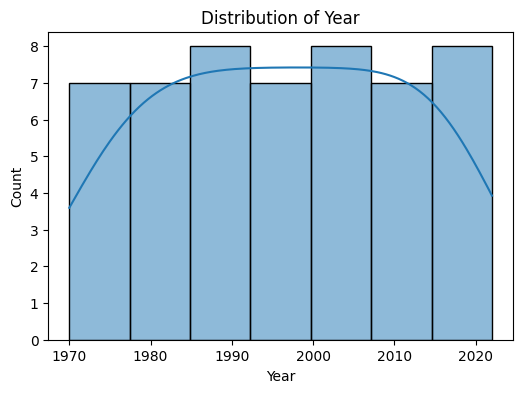

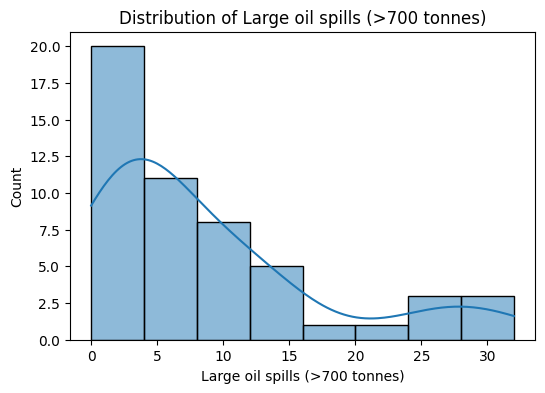

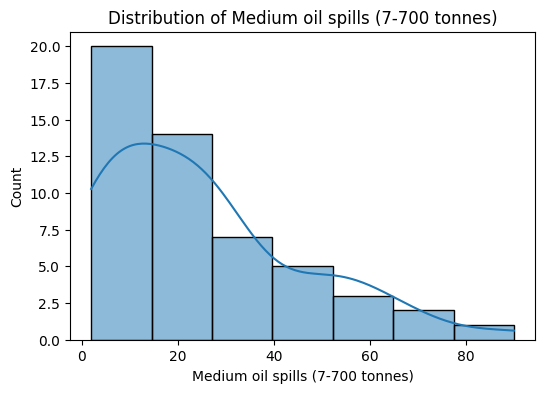

In [20]:
for column in number_oil_spills.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(number_oil_spills[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

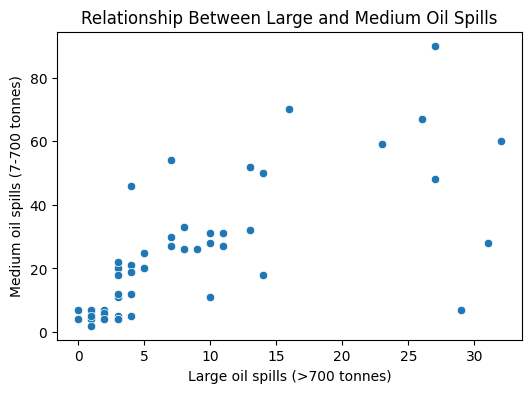

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=number_oil_spills, x='Large oil spills (>700 tonnes)', y='Medium oil spills (7-700 tonnes)')
plt.title('Relationship Between Large and Medium Oil Spills')
plt.show()

In [22]:
number_oil_spills['Total oil spills'] = number_oil_spills['Large oil spills (>700 tonnes)'] + number_oil_spills['Medium oil spills (7-700 tonnes)']

# Display the first few rows of the dataset to check the new feature
print(number_oil_spills.head())

   Year  Large oil spills (>700 tonnes)  Medium oil spills (7-700 tonnes)  \
0  1970                              29                                 7   
1  1971                              14                                18   
2  1972                              27                                48   
3  1973                              31                                28   
4  1974                              27                                90   

   Total oil spills  
0                36  
1                32  
2                75  
3                59  
4               117  


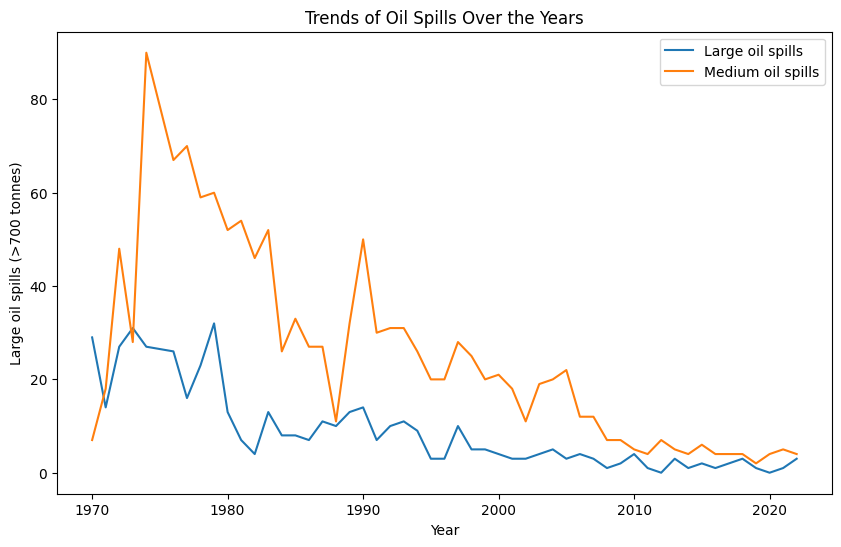

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(data=number_oil_spills, x='Year', y='Large oil spills (>700 tonnes)', label='Large oil spills')
sns.lineplot(data=number_oil_spills, x='Year', y='Medium oil spills (7-700 tonnes)', label='Medium oil spills')
plt.title('Trends of Oil Spills Over the Years')
plt.legend()
plt.show()

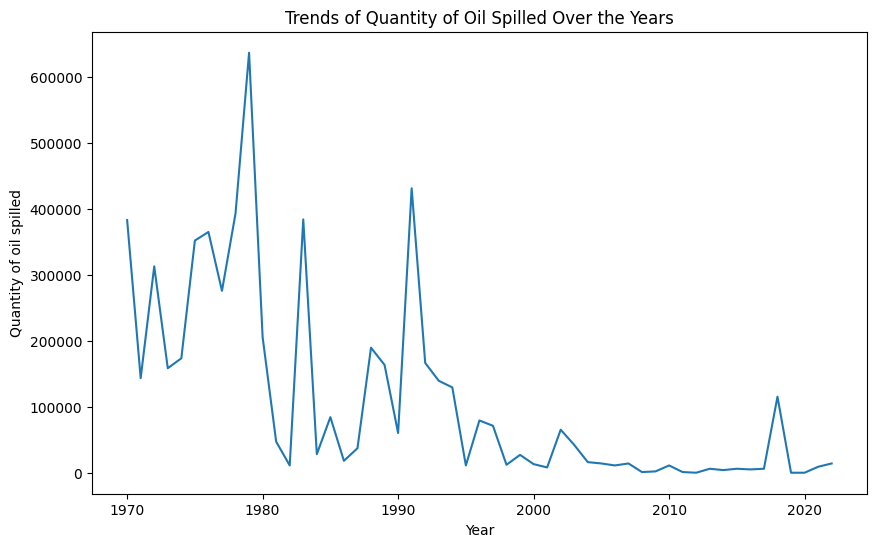

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=quantity_oil_spills, x='Year', y='Quantity of oil spilled')
plt.title('Trends of Quantity of Oil Spilled Over the Years')
plt.show()

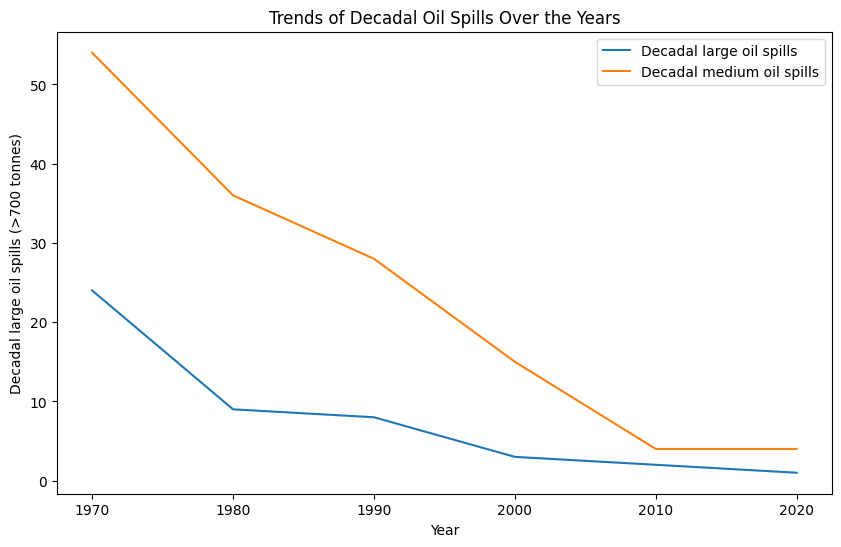

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=large_oil_spills_decadal, x='Year', y='Decadal large oil spills (>700 tonnes)', label='Decadal large oil spills')
sns.lineplot(data=large_oil_spills_decadal, x='Year', y='Decadal medium oil spills (7-700 tonnes)', label='Decadal medium oil spills')
plt.title('Trends of Decadal Oil Spills Over the Years')
plt.legend()
plt.show()

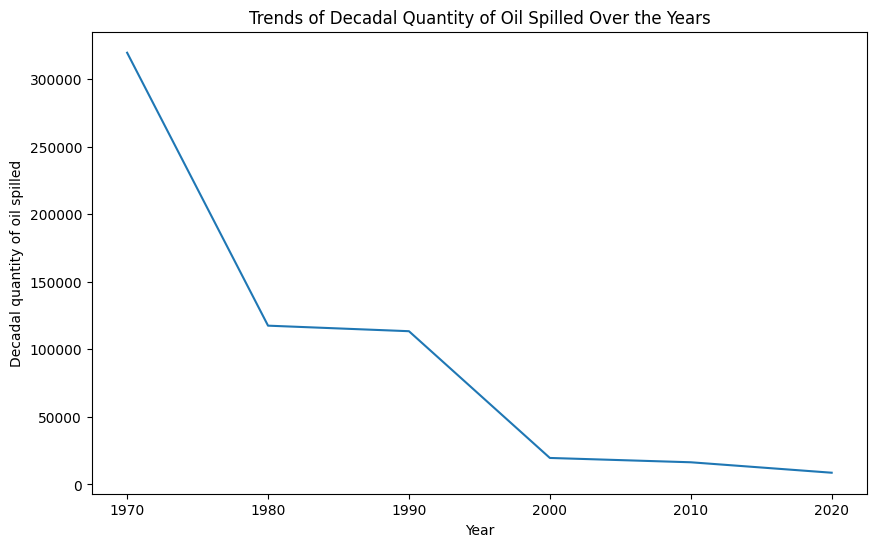

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(data=quantity_oil_spills_decadal_average, x='Year', y='Decadal quantity of oil spilled')
plt.title('Trends of Decadal Quantity of Oil Spilled Over the Years')
plt.show()